In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [5]:
dfam= pd.read_csv("amz_uk_price_prediction_dataset.csv")

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

A)Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

B)Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

C)Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

### PARTE 1: A

In [6]:
crosstab=pd.crosstab(dfam.category, dfam.isBestSeller)
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
dfbes=dfam[dfam['isBestSeller']==1]

In [8]:
dfbes2=dfbes.groupby('category')['isBestSeller'].sum()
dfbes3=dfbes2.sort_values(ascending=False)
dfbes3

category
Grocery                                   556
Health & Personal Care                    552
Baby                                      341
Sports & Outdoors                         330
Power & Hand Tools                        306
                                         ... 
Motorbike Handlebars, Controls & Grips      1
I/O Port Cards                              1
Smart Speakers                              1
Snowboard Bindings                          1
3D Printers                                 1
Name: isBestSeller, Length: 260, dtype: int64

### PARTE 1 :B

In [9]:
_, p_value, _, _ = chi2_contingency(crosstab)

In [10]:
p_value

0.0

El resultado según Chi-square nos demuestra que si hay relación entre el género y el BestSeller por lo que la hipótesis nula se elimina.

In [11]:
cramer= association(crosstab, method='cramer')
cramer

0.1222829439760564

En cambio, por el sistema de Cramer´s nos indica que la fuerza de dicha relación no es tan fuerte.

### PARTE 1: C

<Axes: xlabel='category'>

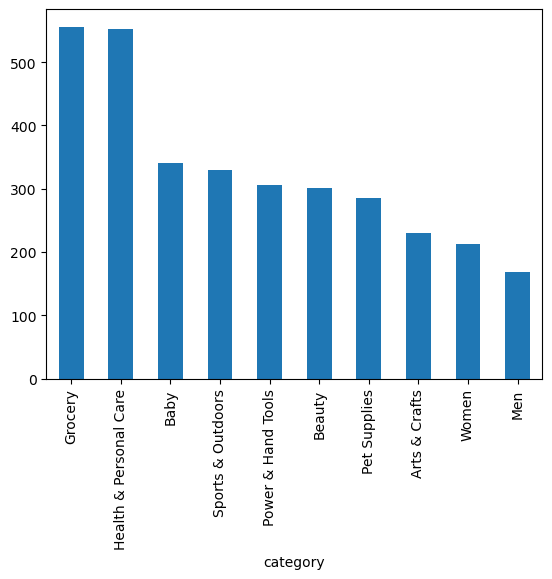

In [12]:
dfbes4=dfbes3.head(10)


dfbes4.plot(kind="bar", stacked=True)

### PARTE 2

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

### 

In [37]:
dfq3=dfam['price'].quantile(0.75)
dfq1=dfpr1=dfam['price'].quantile(0.25)
iqr=dfq3-dfq1
iqr
iqrmin=dfq1-1.5*iqr
iqrmax=dfq3+1.5*iqr
iqrmax

99.99000000000001

In [47]:
df_filtrado = dfam[(dfam['price'] >=iqrmin) & (dfam['price'] <=iqrmax)]
df_filtrado

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Parte 2: B

In [88]:
df6=df_filtrado['category'].value_counts().nlargest(20).index

In [105]:
top_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

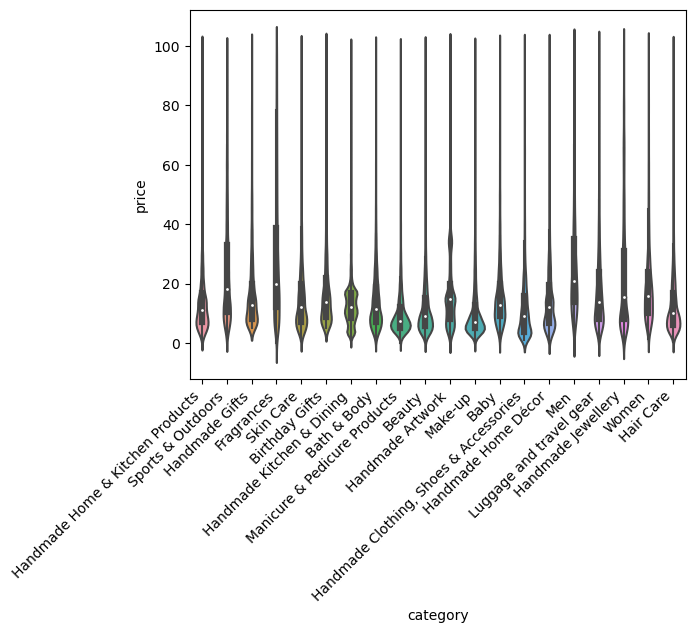

In [94]:
top_categories = df_filtrado['category'].value_counts().nlargest(20).index
df_top20 = df_filtrado[df_filtrado['category'].isin(top_categories)]



sns.violinplot(data=df_top20, x='category', y='price')
plt.xticks(rotation=45, ha='right')
plt.show()

### 

### Parte 2: c

<Axes: xlabel='stars', ylabel='category'>

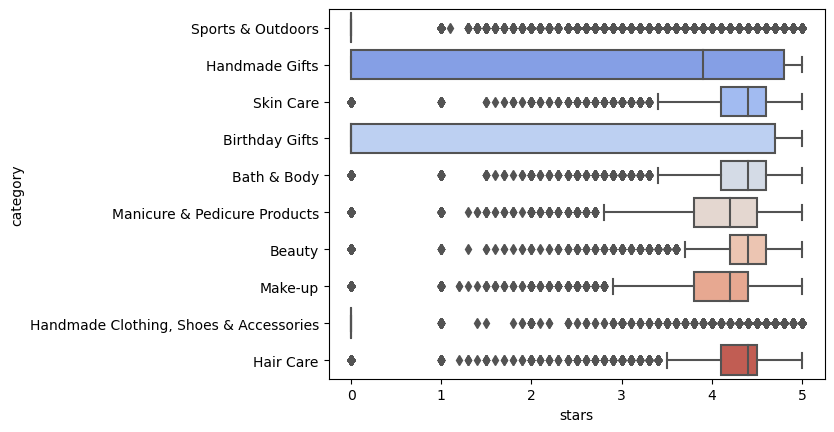

In [112]:
sns.boxplot
top_10= df_filtrado['category'].value_counts().nlargest(10).index
dftop_10 = df_filtrado[df_filtrado['category'].isin(top_10)]
sns.boxplot(data=dftop_10, x="stars", y="category", palette="coolwarm")

### Part 3:

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.


### Parte 3: a

In [117]:
corr_pea = df_filtrado["price"].corr(df_filtrado["stars"])
corr_pea

-0.0776729987818137

<Axes: xlabel='price', ylabel='stars'>

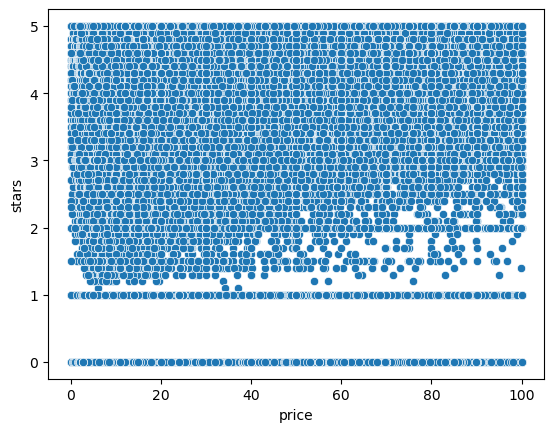

In [118]:
sns.scatterplot(data=df_filtrado, x="price", y="stars")

<Axes: >

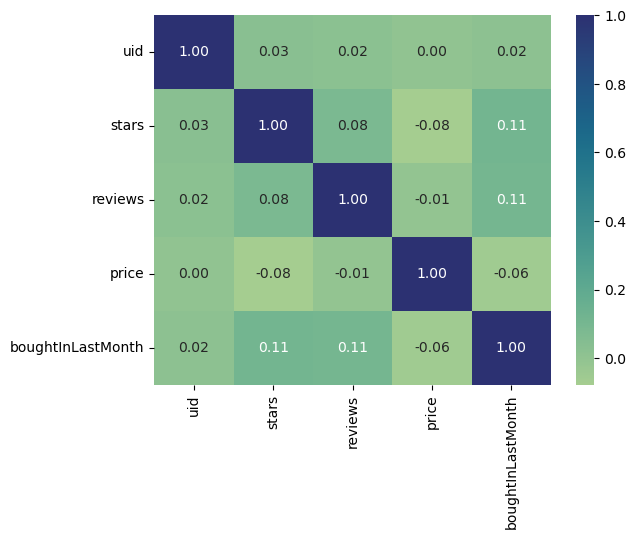

In [129]:
columnas_variables = df_filtrado.select_dtypes(include='number')

columnas_variables2=columnas_variables.corr()

sns.heatmap(columnas_variables2, annot=True, cmap="crest", fmt=".2f")



Esto nos refuerza las ideas del principio. Hay relaciones pero las mismas no son fuertes.

### Parte 3: B

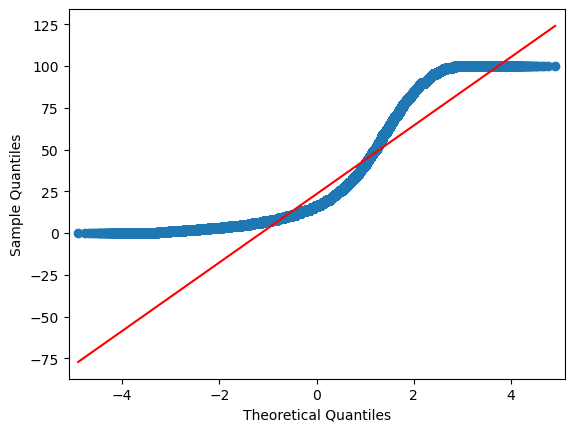

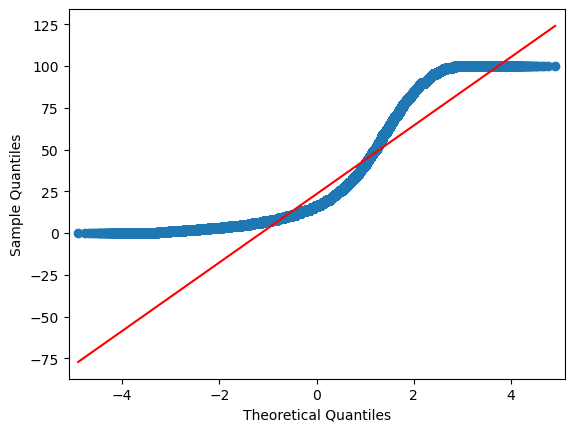

In [130]:
import statsmodels.api as sm 
sm.qqplot(df_filtrado["price"], line="s")

Tipo no lineal por el tipo de datos que tenemos (del 1 al 5) y no podemos garantizar que sea monotónica...